# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

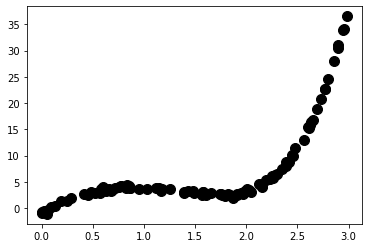

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [26]:
model2 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([29.73226024,  7.14167989,  3.91387225,  4.25623515, -1.34129364,
       -2.98061817,  6.99306744,  2.12283119, 22.15001476,  3.90813424,
        1.9574472 , 35.48116116,  4.28497336,  7.28259045,  7.59497107,
        3.88769208,  3.86783433,  2.75848946, -2.08835759,  2.70017638,
        1.7119257 ,  3.31752751, 11.51974663,  3.68479113,  1.88579497,
        1.98118181, 29.06532032, -1.34067586, -2.0956045 ,  3.40221032,
        1.89796947,  4.14978707,  3.2013676 , 31.04088958,  5.08866306,
        2.32531362,  2.36019429,  3.10353826,  3.82799514,  2.50978413])

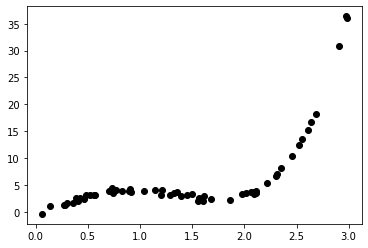

In [10]:
plt.plot(X_train, y_train, 'ok');
plt.show()

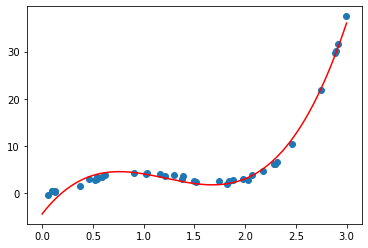

In [27]:
XX = np.linspace(0, 3, 1000)
XX = XX.reshape(-1, 1)
plt.plot(X_test, y_test, 'o')
plt.plot(XX, model2.predict(XX), 'r');
plt.show()


In [9]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.9876930164882115
Explained variance score: 0.9876930164882115
Median absolute error: 0.6412946173271592
Mean squared error: 0.7901449591204813
Mean absolute errors: 0.7079401779392457


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [14]:
model3 = make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression())
model3.fit(X_train, y_train)
model3.predict(X_test)

array([ 9.58567274,  4.0122095 , 27.60590935,  3.70468803,  2.87816717,
        6.22647682, 15.00288272, 13.44750369, 24.88840676,  3.90327988,
        3.4703274 ,  4.85376209,  3.20054175,  0.38911018,  3.59601813,
        7.26656306,  2.83376742,  3.093901  ,  2.77663828,  6.0140342 ,
        4.00923919, -0.21958876,  2.76158499, 10.45234976,  2.97744369,
        3.80145663,  3.76254923,  7.99426006,  3.25303229,  4.895003  ,
        6.48700887,  3.17959499,  4.00141356, 34.69926644, 18.45520998,
       -0.87965282,  3.51988531,  2.51989189,  4.59854173,  2.41550815])

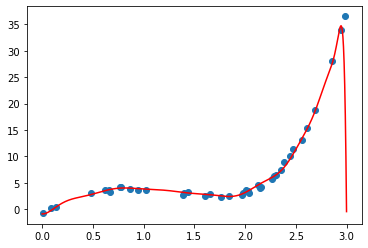

In [15]:
XX = np.linspace(0, 3, 1000)
XX = XX.reshape(-1, 1)
plt.plot(X_test, y_test, 'o')
plt.plot(XX, model3.predict(XX), 'r');
plt.show()
